<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/M3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de información GITHUB

In [16]:
try:
    !rm -rf CursoDF
except:
    print("No existe la ruta aún")

!git clone "https://github.com/pikey-msc/CursoDF"

Cloning into 'CursoDF'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 105 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (105/105), 6.44 MiB | 9.32 MiB/s, done.
Resolving deltas: 100% (40/40), done.


#Carga de librerías

In [0]:
#Cargar módulo de R en Python
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [0]:
%%R
#install.packages("dplyr")
library(dplyr) # "Libreria utilizada para manejar datos"
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)
install.packages("ModelMetrics")
library(ModelMetrics)
install.packages("party")
library(party)
install.packagest("boot")
library(boot)
install.packagest("ipred")
library(ipred)
install.packagest("randomForest")
library(randomForest)



#Árboles de decisión

**Algoritmos**\
Existen diversos algoritmos para solucionar el problema anterior, cada uno utiliza metodologías distintas para particionar los datos así como para definir el criterio de paro del algorimo.
* ID3
* C4.5

**Elementos**\
Un árbol de decisión está formado por un conjunto de nodos de decisión (interiores) y de nodos-respuesta (hojas):
* Un nodo de decisión está asociado a uno de los atributos y tiene 2 o más ramas que salen de él, cada una de ellas representando los posibles valores que puede tomar el atributo asociado. De alguna forma, un nodo de decisión es como una pregunta que se le hace al ejemplo analizado, y dependiendo de la respuesta que de, el flujo tomará una de las ramas salientes.
* Un nodo-respuesta está asociado a la clasificación que se quiere proporcionar, y nos devuelve la decisión del árbol con respecto al ejemplo de entrada.

**ID3**\
El ID3 construye un árbol de decisión de arriba a abajo, de forma directa, sin hacer uso de backtracking, y basándose únicamente en los ejemplos iniciales proporcionados. Para ello, usa el concepto de Ganancia de Información para seleccionar el atributo más útil en cada paso.\
En cierta forma, sigue un método voraz para decidir la pregunta que mayor ganancia da en cada paso, es decir, aquella que me permite separar mejor los ejemplos entre sí respecto a la clasificación final.

**Informacion**\
La medida que se utiliza se llama entropía y se utiliza para clasificar los elementos procurando:
* Muestra completamente homogénea (es decir, en la que todos se clasifican igual).En este caso, fijaremos la incertidumbre (entropía) a 0
* Muestra igualmente distribuida, es decir, que tiene el mismo número de ejemplos.En este caso, fijaremos la incertidumbre (entropía) a 1

Para medir la incertidumbre de un sistema. Shannon llega a la conclusión de que la mejor función matemática que mide este grado de incertidumbre es la siguiente:

$$\textrm{Information Gain}=IG=\sum_{i=1}^c -p_ilog_2(p_i)$$

donde $S$ es el conjunto de muestras (el sistema analizado), $C$ es el número de diferentes clasificaciones que usamos, y cada $p_i$ es la proporción de ejemplos que hay de la clasificación $i$ en la muestra.

**Ejemplo teórico**\
El algoritmo ID3 se ejecuta recursivamente en nodos que no sean de respuesta (hojas) hasta llegar al caso de entropía nula.

<div class="figure">
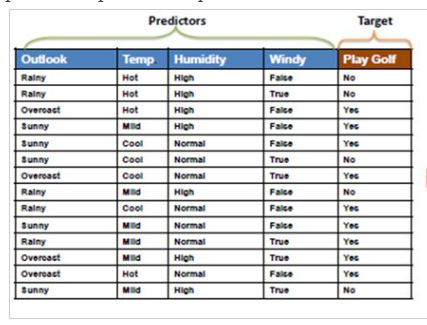

</div>


Paso 1. Antes de realizar ninguna división por atributos, la entropía del sistema es:
<div class="figure">
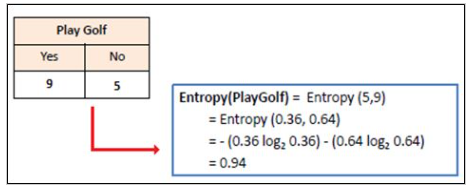

</div>


Paso 2. Calcula la ganancia que obtendríamos si hicieramos una división usando el primer atributo (Outlook):
<div class="figure">
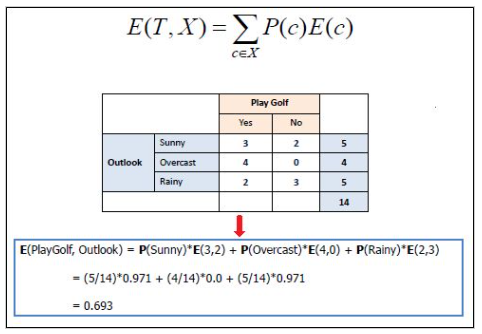

</div>


Paso 3. Se repite con cada uno de los atributos que tienen los ejemplos:
<div class="figure">
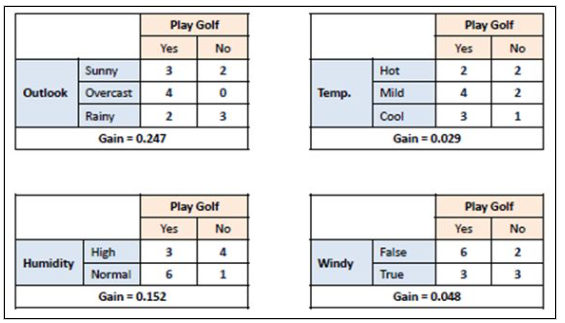

</div>


Paso 4. Se queda con el atributo que proporciona mayor ganancia (en este caso, Outlook), con lo que tenemos construido el primer paso del árbol de decisión, identificando el primer nodo de decisión:
<div class="figure">
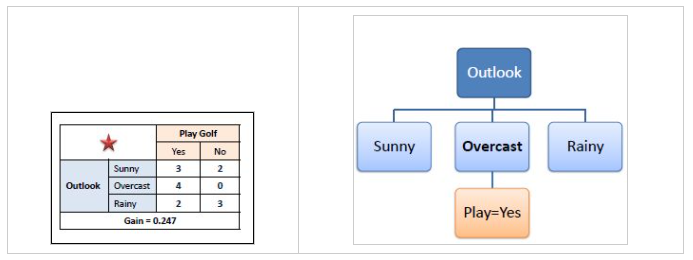

</div>


Paso 5. A continuación nos situamos en cada uno de los subconjuntos de ejemplos que define cada valor del atributo seleccionado y repetimos el proceso, construyendo poco a poco el árbol completo de decisión. Un nodo que tenga entropía nula se convierte en un nodo respuesta, ya que representa una muestra homogénea en el que la clasificación final es la misma para todos los ejemplos que contiene:
<div class="figure">
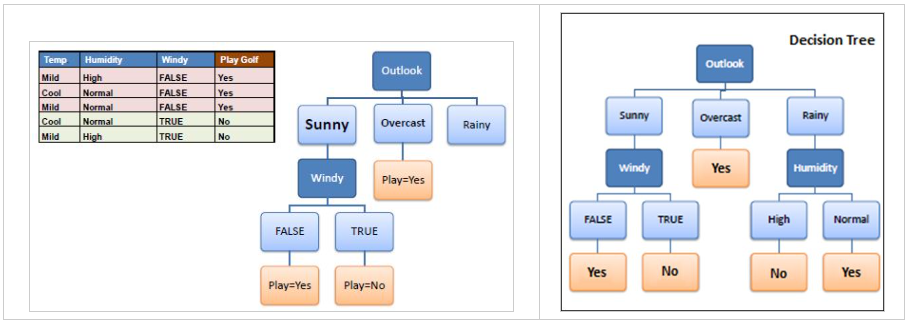

</div>


Uno de los aspectos más interesantes que nos ofrecen los árboles de decisión como máquinas de predicción es que nos permiten explicar porqué un determinado ejemplo se clasifica de una cierta forma, y podemos extraer un procedimiento que se implementa fácilmente en cualquier sistema haciendo uso de reglas condicionales.
<div class="figure">
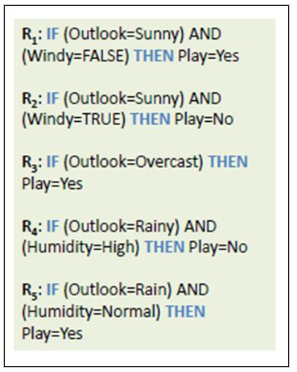

</div>


**Ventajas**
* Son fáciles de entender, interpretar y explicar
* No requieren de mucho trabajo previo en preparar la base de datos de entrenamiento
* Funcionan con datos numéricos y categóricos
* Trabajan con datos no lineales
* Se pueden hacer pruebas estadísticas sobre los resultados, lo cual da mayor confianza al modelo
* Es robusto, funciona incluso si los datos no cumplen con los supuestos
* Es escalable a bases de datos grandes

**Desventajas y limitaciones**
* Alcanzar un óptimo global es un problema, por lo tanto se utilizan heurísticas para encontrar la solución al problema de optimización
* Pequeños cambios en los datos puede resultar en cambios radicales en la segmentación del arbol
* Alta varianza
* El tamaño y complejidad del árbol puede ser muy alto

###Ejemplo. Arbol decision datos IRIS
**Separación en conjunto de entrenamiendo y prueba**
Al igual que en la clase anterior separemos la base de datos en el conjunto de entrenamiento y prueba.

In [9]:
%%R
data(iris)
print(head(iris))
# Muestra del 80% del total

smp_size <- floor(0.80 * nrow(iris))

# fijar la semilla para que la muestra pueda ser reproducible
# 42 es la respuesta al sentido de la vida, el universo y todo lo demás

set.seed(42)

train_ind <- sample(seq_len(nrow(iris)), size = smp_size)

train <- iris[train_ind, ]
test <- iris[-train_ind, ]
print("tamaño de conjunto de entrenamiento:") 
print(nrow(train))
print("tamaño de conjunto de prueba:") 
print(nrow(test))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa
[1] "tamaño de conjunto de entrenamiento:"
[1] 120
[1] "tamaño de conjunto de prueba:"
[1] 30


Calcular árbol de decisión

In [10]:
%%R
part_tree <- rpart(Species ~ .,  data = train, method = "class",
                   minsplit = 5)

summary(part_tree)

Call:
rpart(formula = Species ~ ., data = train, method = "class", 
    minsplit = 5)
  n= 120 

          CP nsplit  rel error     xerror       xstd
1 0.50632911      0 1.00000000 1.17721519 0.05790361
2 0.44303797      1 0.49367089 0.65822785 0.06871292
3 0.02531646      2 0.05063291 0.10126582 0.03458886
4 0.01000000      3 0.02531646 0.07594937 0.03022110

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          34           33           21           12 

Node number 1: 120 observations,    complexity param=0.5063291
  predicted class=setosa      expected loss=0.6583333  P(node) =1
    class counts:    41    39    40
   probabilities: 0.342 0.325 0.333 
  left son=2 (41 obs) right son=3 (79 obs)
  Primary splits:
      Petal.Length < 2.45 to the left,  improve=40.48966, (0 missing)
      Petal.Width  < 0.8  to the left,  improve=40.48966, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=27.81444, (0 missing)
      Sepal.Width  < 3.15 to the righ

Visualizar el árbol

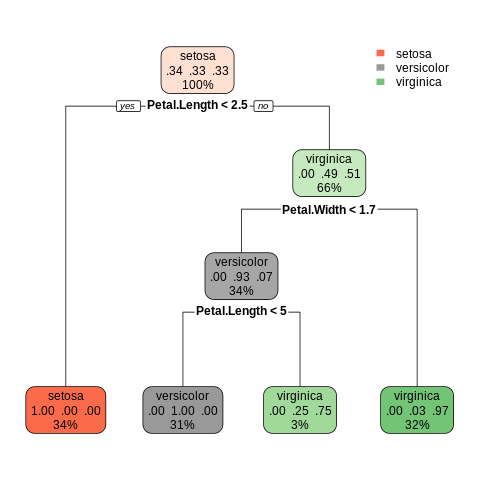

In [13]:
%%R
rpart.plot(part_tree)

Importancia de cada parámetro

In [14]:
%%R
part_tree$variable.importance

 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
    72.47499     69.80221     44.92336     26.19314 


### Ejercicio de Crédito Banco Alemán

In [18]:
%%R
credit <- read.table("CursoDF/M3/Datos/credit.txt")

credit=mutate(credit,V21=as.factor(V21))

cred_nam=c("Status of existing checking account","Duration in month","Credit history","Purpose","Credit amount","Present employment since","Installment rate in percentage of disposable income","Personal status and sex","Other debtors / guarantors","Present residence since","Property","A124 : unknown / no property","Age in years","Other installment plans","Housing","Number of existing credits at this bank","Job","Number of people being liable to provide maintenance for","Telephone","foreign worker", "V21")

names(credit)=cred_nam

names(credit)<-make.names(names(credit))

print(summary(credit))
# Define el numero total de renglones de los datos

n <- nrow(credit)

## Define el número de renglones para el conjunto de entrenamiento (80% de la base de datos) 

n_train <- round(n * .80) 

## Crea un vector de indices que sea el 80% de la muestra aleatoria

set.seed(123)

train_indices <- sample(seq_len(n), size = n_train)

# Obten el conjunto de indices para los datos de entrenamiento 

credit_train <- credit[train_indices,]#  
print("Tamaño datos entrenamiento:")
print(nrow(credit_train))
# Excluye los indices de entrenamiento para crear el conjunto de prueba

 credit_test <- credit[-train_indices, ]   
print("Tamaño datos prueba:")
print(nrow(credit_test))
# Utiliza el data frame de credit_train para con los datos de entrenamiento crear un arbol de decision



 Status.of.existing.checking.account Duration.in.month Credit.history
 A11:274                             Min.   : 4.0      A30: 40       
 A12:269                             1st Qu.:12.0      A31: 49       
 A13: 63                             Median :18.0      A32:530       
 A14:394                             Mean   :20.9      A33: 88       
                                     3rd Qu.:24.0      A34:293       
                                     Max.   :72.0                    
                                                                     
    Purpose    Credit.amount   Present.employment.since
 A43    :280   Min.   :  250   A61:603                 
 A40    :234   1st Qu.: 1366   A62:103                 
 A42    :181   Median : 2320   A63: 63                 
 A41    :103   Mean   : 3271   A64: 48                 
 A49    : 97   3rd Qu.: 3972   A65:183                 
 A46    : 50   Max.   :18424                           
 (Other): 55                                    

Calcular el modelo 

n= 800 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 800 230 1 (0.7125000 0.2875000)  
    2) Status.of.existing.checking.account=A13,A14 365  48 1 (0.8684932 0.1315068) *
    3) Status.of.existing.checking.account=A11,A12 435 182 1 (0.5816092 0.4183908)  
      6) Duration.in.month< 22.5 259  85 1 (0.6718147 0.3281853)  
       12) Credit.history=A32,A33,A34 235  68 1 (0.7106383 0.2893617)  
         24) Purpose=A41,A410,A42,A43,A49 146  32 1 (0.7808219 0.2191781) *
         25) Purpose=A40,A44,A45,A46,A48 89  36 1 (0.5955056 0.4044944)  
           50) Credit.amount>=1306.5 48  12 1 (0.7500000 0.2500000) *
           51) Credit.amount< 1306.5 41  17 2 (0.4146341 0.5853659)  
            102) Duration.in.month< 11 12   2 1 (0.8333333 0.1666667) *
            103) Duration.in.month>=11 29   7 2 (0.2413793 0.7586207) *
       13) Credit.history=A30,A31 24   7 2 (0.2916667 0.7083333) *
      7) Duration.in.month>=22.5 176  79 2 (0.4488636 0.5511364)  
  

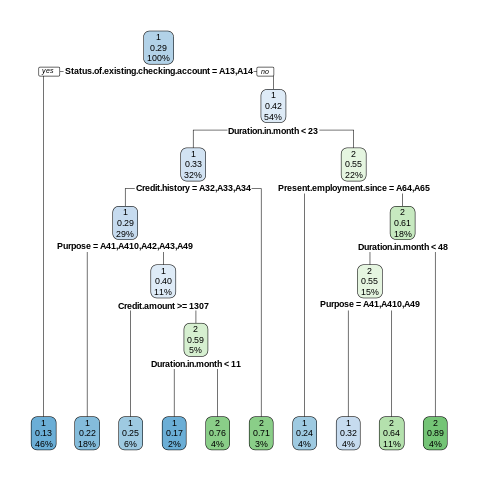

In [23]:
%%R
# Define el modelo de entrenamiento

credit_model <- rpart(formula = as.factor(V21)~., 
                      data = credit_train, 
                      method = "class")
rpart.plot(credit_model)
# Observa las salidas del modelo  

print(credit_model)

# Genera la clase de predicción para los datos de "credit_test"

# Utiliza la matriz de confusión para los datos prueba

# Genera el modelo de predicción
 class_prediction <- predict(object =credit_model,  
                        newdata = credit_test,   
                        type = "class")  

# Calcula la matriz de confusión para el conjunto de datos prueba
 confusionMatrix(as.factor(credit_test$V21), class_prediction)


##Método de segmentación Gini
La idea de la segmentación del arbol es crear segmentaciones puras
<div class="figure">
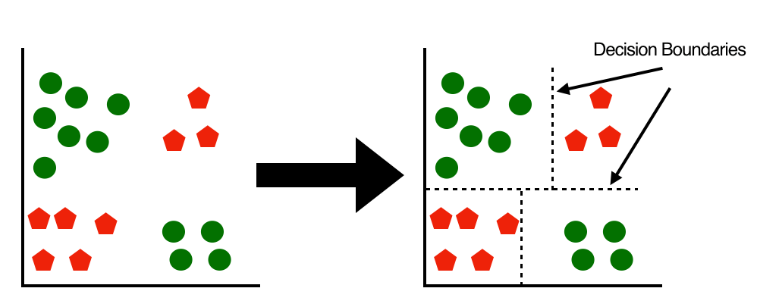

</div>


Sin embargo, esto no es posible, por lo que los algoritmos de segmentación del arbol crearan regiones lo mas puras posible.\
La segmentación de Gini busca obtener grupos mas homogeneos
<div class="figure">
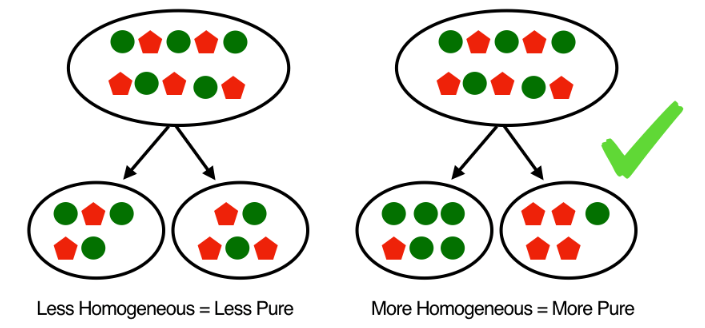

</div>


Por tanto, es una escala que permite medir que tan puro es el modelo.
<div class="figure">
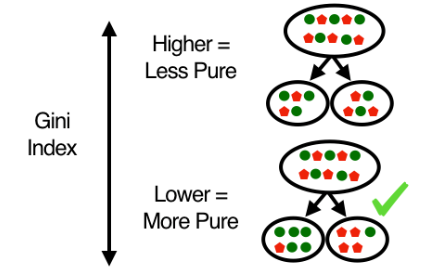

</div>


Entre mas puro es el modelo, menor sera el indice de Gini y viceversa.\
Ejemplo de datos de crédito con modelo de Gini.
Compara dos modelos que utilizan dos criterios diferentes (gini o information) y utiliza la validacion para escoger el mejor modelo de este grupo.

1. Modelo 1 con la condición split = gini

2. Modelo 2 con la condicion split = information

3. Genera predicciones sobre el conjunto de validaciones de ambos modelos

4. La clasificación del error “ce()” es la fracción incorrectamente clasificada de instancias. Computa y compara los datos prueba de ambos modelos.

Call:
rpart(formula = V21 ~ ., data = credit_train, method = "class", 
    parms = list(split = "gini"))
  n= 800 

          CP nsplit rel error    xerror       xstd
1 0.03913043      0 1.0000000 1.0000000 0.05565812
2 0.02608696      4 0.8130435 0.9304348 0.05443558
3 0.02173913      6 0.7608696 0.9521739 0.05483240
4 0.01000000      9 0.6956522 0.9304348 0.05443558

Variable importance
                Status.of.existing.checking.account 
                                                 28 
                                  Duration.in.month 
                                                 19 
                                            Purpose 
                                                 11 
                                      Credit.amount 
                                                 11 
                                     Credit.history 
                                                 10 
                           Present.employment.since 
                         

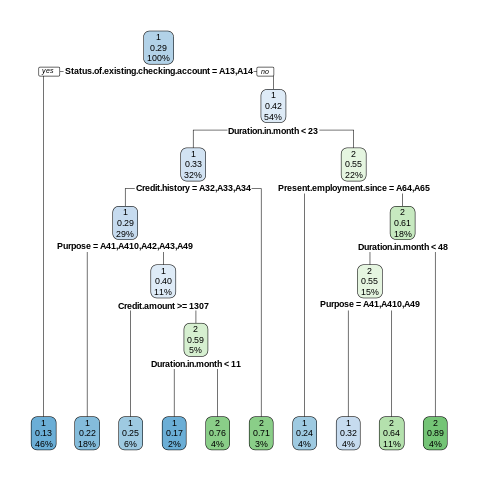

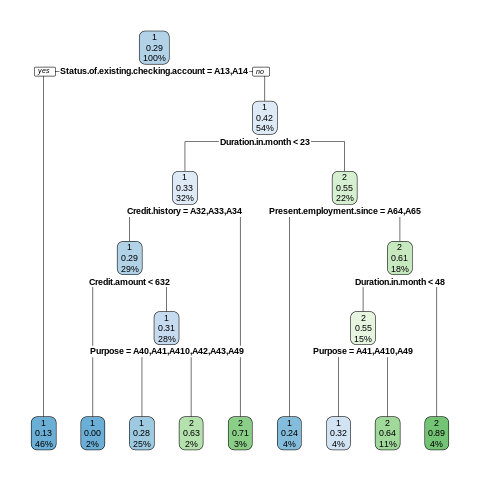

In [26]:
%%R
 # Modelo Gini
 credit_model1 <- rpart(formula = V21 ~ ., 
                        data = credit_train, 
                        method = "class",
                        parms = list(split = "gini"))
 summary(credit_model1)
 rpart.plot(credit_model1)
 # Modelo information
 credit_model2 <- rpart(formula = V21 ~ ., 
                        data = credit_train, 
                        method = "class",
                        parms = list(split = "information"))
 rpart.plot(credit_model2)
 
 # Genera predicciones a partir del modelo de Gini
 pred1 <- predict(object =credit_model1,
                  newdata = credit_test,
                  type = "class")    
 
 # Genera predicciones a partir del modelo de Information
 pred2 <- predict(object =credit_model2,
                  newdata = credit_test,
                  type = "class")    
 
 # Comparacion de modelo clasificacion
 print(confusionMatrix(as.factor(credit_test$V21), as.factor(pred1)))
 
 
 print(confusionMatrix(as.factor(credit_test$V21),as.factor(pred2)))

 ce(actual = credit_test$V21, 
      predicted = pred1)
 ce(actual = credit_test$V21, 
      predicted = pred2)


## Árbol de decisión condicional 
Ejemplo con datos de Iris: Ajuste de modelo y visualización


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  120 

1) Petal.Length <= 1.9; criterion = 1, statistic = 111.826
  2)*  weights = 41 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 53.506
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 12.882
      5)*  weights = 35 
    4) Petal.Length > 4.8
      6)*  weights = 6 
  3) Petal.Width > 1.6
    7)*  weights = 38 


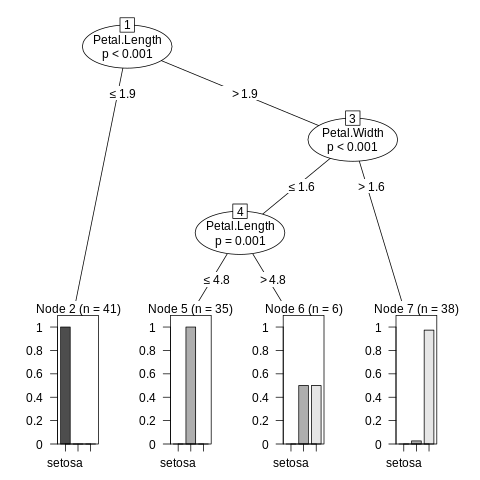

In [32]:
%%R
cond_tree <- ctree(Species ~ .,  data = train, 
                  controls = ctree_control(mincriterion = 0.95,
                                            minbucket = 5))

print(cond_tree)
plot(cond_tree)

Predicción y matriz de confusión

In [33]:
%%R
part_pred = predict(part_tree, newdata = test, type = "class")

cond_pred = predict(cond_tree, newdata = test, type = "response")
print(confusionMatrix(test$Species, part_pred))
print(confusionMatrix(test$Species, cond_pred))

     [,1] [,2]
[1,]    0    0
[2,]    0    9
     [,1] [,2]
[1,]    0    0
[2,]    0    9


## Árboles de Regresión
Los árboles de regresión sirven para cuando la salida no es una variable categórica, es decir, es numérica.
Las metricas de regresion mas comunes para evaluar el modelo son:


<div class="figure">
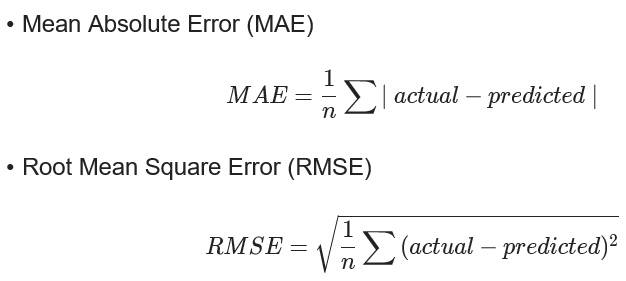

</div>


Estas metricas miden la distancia que existe entre el valor proyectado por el modelo versus el valor real.En ambos casos, mientras menor sea el valor de estas metricas, mejor sera el modelo de predicción.

### Ejercicio Estudiantes
Datos del Comportamiento de los estudiantes
El objetivo de estos datos es predecir la calificación del examen final de los estudiantes de matemáticas en base a las siguientes variables: sexo, edad, dirección, tiempo de estudio, materia optativa, educación de la familia, pago de extra clase e inasistencias. Para este caso la variable respuesta es la calificación final (numerica de 0 a 20). La información puede consultarse en:
https://archive.ics.uci.edu/ml/datasets/student+performance
En este ejercicio, se dividen los datos en: Entrenamiento (training), Validación (validation) y Prueba (test).
Se Introduce una nueva particion (validation) que sera utilizada para seleccionar el “mejor modelo” dentro de un conjunto de modelos.\
Durante el curso hemos demostrado diversas formas de separar la información en dos conjuntos mediante la función muestra (sample).\
Para este ejercicio se utilizara nuevamente la función sample, para separar la información en tres conjuntos.
Sin embargo, en lugar de muestrear los indices, se utilizara la función `sample()` para asignar a cada renglon dentro de alguno de los conjuntos utilizando una distribución de probabilidad.

Dividir la base en train, valid y test
Abrir los datos y segmentar la base de datos en: train, valid y test

In [0]:
%%R
# Verificar que la tabla tiene 33 variables
grade_all <- read.csv("CursoDF/M3/Datos/student-mat.csv", header = TRUE,sep=";")


# Seleccionar solo 8 variables
grade <- select(grade_all,G1,age, address, studytime, schoolsup,famsup,paid, absences)

# Segmentar de forma aleatoria los renglones en 3 conjuntos: train (70%), valid (15%) y test (15%)
set.seed(1)
assignment <- sample(1:3, size = nrow(grade), prob = c(.70,.15,.15), replace = TRUE)

# Crear las bases de datos a partir de la segmentación anterior

grade_train <- grade[assignment == 1, ]    # subset the grade data frame to training indices only
grade_valid <- grade[assignment == 2, ]  # subset the grade data frame to validation indices only
grade_test <- grade[assignment == 3, ]   # subset the grade data frame to test indices only
print("n entrenamiento")
print(nrow(grade_train))
print("n prueba")
print(nrow(grade_valid))
print("n validación")
print(nrow(grade_test))

Se utilizara la tabla “grade_train”" para ajustar un árbol de regresión utilizando la paquetería `rpart()` y visualizarla con `rpart.plot()`. El arbol de regresion se vera identico a un arbol de clasificación con la excepcion de que tendra valores numericos en los nodos en lugar de clases de predicción.\
Para ajustar un arbol de decision es importante utilizar el metodo `class`, sin embargo para un arbol de regresión se debe utilizar el metodo ``anova``.

In [0]:
%%R
# Modelo de entrenamiento
grade_model <- rpart(formula = G1 ~ ., 
                     data = grade_train, 
                     method = "anova")

# Ver la salida del modelo                     
print(grade_model)
# Grafica del arbol de decision
rpart.plot(x = grade_model, yesno = 2, type = 0, extra = 0)

Evaluar el modelo de árbol de regresión
* Paso.1 Predecir la calificación final de todos los estudiantes para el conjunto test.
* Paso 2. Evaluar el modelo con la metrica RMSE (Root Mean Squared Error). Esta métrica mide la distancia entre las valores proyectados con respecto a los valores reales.

In [0]:
%%R
pred <- predict(object = grade_model,   # model objecto 
                newdata = grade_test)  # datos test 

# Calulo del RMSE
rmse(actual = grade_test[,1], 
     predicted = pred)

### Hiperparámetros del árbol de regresión
Los hiperparametros de un arbol de regresión se utiliza para ajustar mejor el arbol de decision.
En general se pueden hacer 3 tipos de ajuste:
> ``minslip`` = Establece el número minimo de datos requerido para crear la segmentación del nodo del arbol. Por default n = 20

> ``cp``= Parametro de complejidad que va de cero a uno. Entre mas pequeño sea este valor mas complejo sera el arbol(se incrementa el número de segmentos)

> ``maxdepth`` = Profundidad del arbol define el número del nodos del arbol. Por default $n = 30$

La librería ``rpart()`` calcula 10 escenarios de arbol variando el cp los cuales pueden ser analizados con la función ``plotcp()``, para este caso se elegira el valor cp cuyo xerror sea el mas pequeño.
Una vez definido el valor de cp se puede tunear el modelo con la función ``prune()``, el cual regresa el modelo optimizado.

**Tuneando el modelo**\
Utiliza la función ``prune`` y encuentra el mejor valor “CP” (Complexity Parameter)

In [0]:
%%R
# Gráfica de la tabla CP
plotcp(grade_model)
# Imprimir la tabla CP
print(grade_model$cptable)

Obtener el valor cp obtimo a partir de varios escenarios (cross-validated error)


In [0]:
%%R
opt_index <- which.min(grade_model$cptable[, "xerror"])
cp_opt <- grade_model$cptable[opt_index, "CP"]

# Tunear el modelo con el valor cp optimo
grade_model_opt <- prune(tree = grade_model, 
                         cp = cp_opt)
                          
# Grafica del modelo optimo
rpart.plot(x = grade_model_opt, yesno = 2, type = 0, extra = 0)

**Selección del Modelo**\
Modelar diferentes modelos con distintas combinaciones en sus hiperparametros es el objetivo durante la selección del modelo.\
Para elegir el mejor se debera elegir la metrica de medición que mejor aplique a cada caso particular), pr ejemplo: AUC y/o RMSE.\
Sin embargo, la elección de hiperparametros para efectuar la combinación solo se puede hacer de forma manual mediante la gunción expand.grid().

In [0]:
%%R
# Establece una lista de posibles valores para minsplit y maxdepth
minsplit <- seq(1, 4, 1)
maxdepth <- seq(1, 6, 1)

# Crea u data frame que contenga todas las combinaciones  
hyper_grid <- expand.grid(minsplit = minsplit, maxdepth = maxdepth)

# Revisar la combinación de distintos modelos
print(head(hyper_grid)) 
# Imprimir el número de combinaciones o modelos
nrow(hyper_grid)

En este apartado contruiremos un loop para entrenar los modelos u guardar los resultados en una lista llamada “grade_models”

In [0]:
%%R
# Definir el numero de modelos

num_models <- nrow(hyper_grid)

# Crear una lista vacia para guardar los modelos

grade_models <- list()

# Escribir un loop sobre los renglones de los modelos
for (i in 1:num_models) {

    # Obtener los valores deminsplit, maxdepth  para cada renglon i
    minsplit <- hyper_grid$minsplit[i]
    maxdepth <- hyper_grid$maxdepth[i]

    # Entrena el modelo y guardarlo en la lista grade_models
    grade_models[[i]] <- rpart(formula = G1 ~ ., 
                               data = grade_train, 
                               method = "anova",
                               minsplit = minsplit,
                               maxdepth = maxdepth)
}

En esta sección se utiliza la tabla de validación (validation) para evaluar el performance de un conjunto de modelos con el fin de obtener el mejor modelo del grupo.
Todos los modelos del grupo con evaluados con la misma base de validación y el que tenga mejor performance sera considerado como ganador.\
Una vez que se obtiene el mejor modelo, una estimacion final del performance es computado sobre la base de prueba (test)\
La tabla de datos de prueba (test) solo debe utilizarse para estimar el performance y no en la selección del modelo.

In [0]:
# Numero potencial de modelos
num_models <- length(grade_models)

# Crea un vector vacio para guardar los resultados del RMSE
rmse_values <- c()

# Escribe un loop sobre el modelo para guardar los valores RMSE
for (i in 1:num_models) {

    # Actualiza el i - esimo modelo de la lista
    model <- grade_models[[i]]
    
    # Genera predicciones
    pred <- predict(object = model,
                    newdata = grade_valid)
    
    # Calcula el valor de RMSE
    rmse_values[i] <- rmse(actual = grade_valid$G1, 
                           predicted = pred)
}

# Identifica el modelo con el menor RMSE 
best_model <- grade_models[[which.min(rmse_values)]]

# Imprime los parametros del mejor modelo
best_model$control

Calcula el RMSE de la base de datos prueba (train) 

In [0]:
# Calcula el RMSE de la base de datos prueba (train) 
pred <- predict(object = best_model,
                newdata = grade_test)
rmse(actual = grade_test$G1, 
     predicted = pred)

## Árbol Bagging
**Definición de los arboles BAGGING**\
Los modelos basados en arboles BAGGING son una extensión de los modelos basados en arboles de decision.

Este tipo de modelos utilizan un modelo Bootstrap que crea distintas base de entramiento train que se utilizan para calcular diferentes tipos de arboles de decision, mediante este metodo es posible obtener la predicción de los distintos conjuntos de datos bootstrap y ensamblar todos esto resultados en un solo conjunto mediante el promedio.

De ahí el termino de arbol BAGGING (Bootstrap AGGregationING) por el agrupamiento del modelo.

El objetivo de estos modelos es tener un mejor performance: 
1. Reducir la alta variabilidad de la varianza de los modelos de arboles de decision 

2. Evitar que cambios pequeños en los datos deriven en cambios radicales en el arbol de decision.

**Modelo Bootstrap**\
Sea $Z=(x_1,y_1),(x_2,y_3),…,(x_n,y_n)$, el conjunto de datos de entranamiento en el cual se desea ajutar un modelo


<div class="figure">
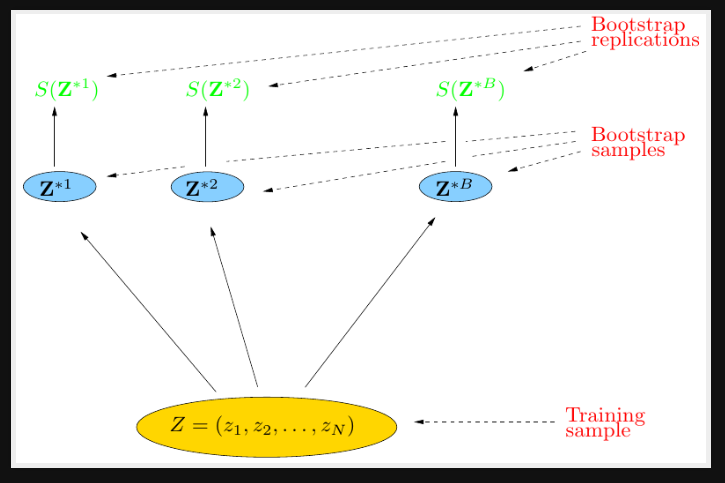

</div>


La idea de bootstrap consiste en muestrear aleatoriamente con reemplazo subconjuntos de entrenamiento del mismo tamañano que el conjunto Z para ajustar distintos modelos con estos datos.

Consideremos el problema de regresión, suponemos que se desea ajustar el modelo a los datos, $Z=(x_1,y_1),(x_2,y_3),\ldots,(x_n,y_n)$ y que $f(x)$ es el modelo que predice $y$.


Mediante bagging se obtendrá un estimador que será el resultado de promediar las estimaciones obtenidas mediante distintas muestras de los datos obtenidas mediante bootstrap.


Para cada muestra $Z^b$ ,$b=1,2,…,B$, se ajustará un modelo y se obtendrá la estimación de $f^b(x)$. El estimador final se define de la siguiente forma:
$$f_{b}ag(x)=\frac{1}{B} \sum f(x)$$

<div class="figure">
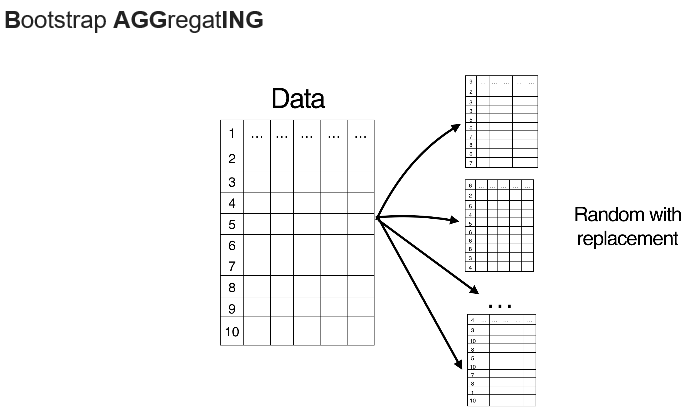

</div>


<div class="figure">
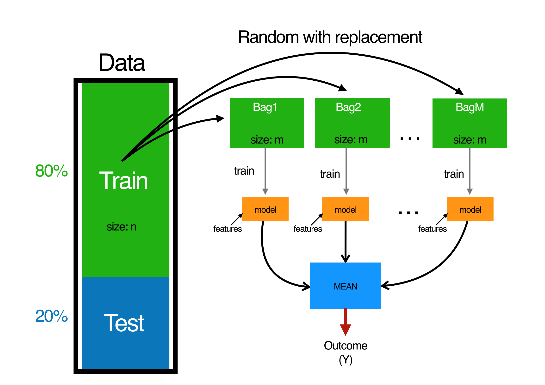

</div>


#### Ejemplo arbol bagging
Entrenamos el modelo de arbol bagging de la tablas de crédito
Para calcular el modelo es necesario utilizar la función ``ipredpackage``. El numero de arboles puede especificarse utilizando el parametro nbagg o el defautl de 25.


Para calcular el accurancy se utiliza muestras OBB (out-of-bag). Las cuales son observaciones de entrenamiento que no fueron seleccionadas dentro de la muestra bootstrap. al no ser utilizadas en entrenamiento, se pueden reutilizar evaluando el accuracy del modelo

In [0]:
%%R
# Para volverlo a reproducir usamos semilla 123
set.seed(123)

# Modelo de Arbol Bagging
credit_model <- bagging(formula = V21 ~ ., 
                        data = credit_train,
                        coob = TRUE)

# imprimimos el modelo
print(credit_model)

Prediccion y matrix de confusión del modelo de arbol bagging

In [0]:
%%R
class_prediction <- predict(object = credit_model,    
                            newdata = credit_test,  
                            type = "class")  # return classification labels

# Print the predicted classes
print(class_prediction)
confusionMatrix(class_prediction,credit_test$V21)

Prediccion y calculo del AUC del modelo de arbol bagging


In [0]:
%%R
pred <- predict(object = credit_model,
                newdata = credit_test,
                type = "prob")

# `pred es una matrix
class(pred)


credit_model$mtrees
credit_model$call
# Calculo del AUC
auc(actual = ifelse(credit_test$V21 == "1", 1, 0), 
    predicted = pred[,"1"]) 



#Random Forest (Bosques aleatorios)
**Introduccion**
Random Forest es un algoritmo de aprendizaje supervisado que puede ser utilizado para problemas de regresión o clasificación


Estos algoritmos fueron desarrollados por Breiman (2001), los conceptos en los que se base son los siguientes:
* Árboles (de clasificación o regresión)
* Bagging: Esta técnica se basa en el remuestreo conocido como boostrap, que tiene una gran eficiencia mejorando el desemepeño de estimadores. Se puede demostrar que la media obtenida tras un proceso de bootstrap se aproxima a la media de la distribución posterior


La precisión e importancia de las variables forman parte de los resultados del modelo


La diferencia entre em modelo Random Forest y Bagging se basa en que el modelo Random Forest utiliza un subconjunto de características que se selecciona al azar en cada división de un árbol de decisión. En el Bagging, se utilizan todas las características.


Fueron nombrados de esta forma por Tim Kam Ho de Bell Labs en 1995

**Ventajas**
* Este método que genera un modelo con alto grado de precisión y el aprendizaje es rápido en comparación a otros algoritmos
* Es posible paralelizar el algoritmo en su totalidad.
Puede manejar bases completas sin necesidad de quitar variables inútiles
* Puede encontrar interacciones complejas entre variables.
* Funciona con variables categóricas y numéricas.
* Trabaja de forma efectiva con datos faltantes, dependiendo el tipo de árbol que se use es el tratamiento que le dará.
* No es necesario escalar variables o hacer tranformaciones de variables de categóricas para utilizarlo.

**Desventajas**
* Pueden llegar a sobreajustar la muestra.
* Si la base de datos tiene datos categóricos con distintos niveles, el algoritmo tendrá un sesgo hacia las variables con más niveles por lo que el modelo final puede no ser tan bueno y además la importancia de las variables no será confiable.

#### Ejemplo datos IRIS

In [0]:
%%R
# Muestra del 80% del total

smp_size <- floor(0.80 * nrow(iris))

# fijar la semilla para que la muestra pueda ser reproducible
# 42 es la respuesta al sentido de la vida, el universo y todo lo demás

set.seed(42)

train_ind <- sample(seq_len(nrow(iris)), size = smp_size)

train <- iris[train_ind, ]

test <- iris[-train_ind, ]


rf <- randomForest(Species ~., data = train,
                   xtest = test[,-5], ytest = test$Species,
                   ntree = 100,
                   do.trace = 10)
print(rf)
plot(rf)

Matriz de confusión en lso datos de prueba e importancia de variables

In [0]:
%%R
print(rf$test$confusion)

varImpPlot(rf)

### Ejemplo con datos de crédito


In [0]:
%%R
set.seed(2**8)  # para repoducirlos poner 1

# Quitar V5
credit_train=subset(credit_train,select=-V5)
credit_test=subset(credit_test,select=-V5)

credit_model <- randomForest(formula = as.factor(V21) ~ .  ,data = credit_train)  


# Ver el modelo

print(credit_model)

err <- credit_model$err.rate
print(head(err))

oob_err <- err[nrow(err), "OOB"]
print(oob_err)

#grafica errores modelo
plot(credit_model)

# Agrega una leyenda
legend(x = "righ", 
       legend = colnames(err),
       fill = 1:ncol(err))

class_prediction <- predict(object = credit_model,   # modelo objeto 
                            newdata = credit_test,   # datos test
                            type = "class")

cm <- caret::confusionMatrix(class_prediction,as.factor(credit_test$V21))  # clases actuales
print(cm)


Modelo con más ramas

In [0]:
%%R
credit_model <- randomForest(formula = as.factor(V21) ~ .,data = credit_train, ntree=100, do.trace=10)  
plot(credit_model)

pred <- predict(object = credit_model, 
                newdata = credit_test,
                type = "prob")


Evaluar métrica AUC

In [0]:
%%R
# `pred` es matrix
print(class(pred))

auc(actual = ifelse(credit_test$V21 == "1", 1, 0), 
    predicted = pred[,"1"])  


**Hiperparametros modelo Random Forest**
* ``ntrees`` = numero de arboles. Por default n = 500
* ``mtry`` =numero de variables aleatorias muestreadas en cada segmento
* ``sampsize``=numero de muestras en la base train. Por default $n = 63$
* ``nodesize``=número de muestras minimo de cada nodo
maxnodes=número máximo de nodos terminales

In [0]:
%%R
set.seed(2**20)              
res <- tuneRF(x = subset(credit_train, select = -V21),
              y = as.factor(credit_train$V21),
              ntreeTry = 500)
print(res)


Tunear un modelo random forest variando mtry, nodesize y sampsize

In [0]:
%%R
mtry <- seq(4, ncol(credit_train) * 0.8, 2)
nodesize <- seq(3, 8, 2)
sampsize <- nrow(credit_train) * c(0.7, 0.8)

# Crear el data frame con todas las combinaciones

hyper_grid <- expand.grid(mtry = mtry, nodesize = nodesize, sampsize = sampsize)

print(head(hyper_grid))

# Crear un vector vacio para guardar el OOB error

oob_err <- c()

# Loop sobre los renglones para obtener diferentes modelos

for (i in 1:nrow(hyper_grid)) {
  
  # Entrena un modelo randmo forest
  
  model <- randomForest(formula = as.factor(V21) ~ .,
                        data = credit_train,
                        mtry = hyper_grid$mtry[i],
                        nodesize = hyper_grid$nodesize[i],
                        sampsize = hyper_grid$sampsize[i], ntree=70)
  
  # Guarda el error OOB       
  
  oob_err[i] <- model$err.rate[nrow(model$err.rate), "OOB"]
}

# Identifica los hiperparametros optimos en base al OOB
opt_i <- which.min(oob_err)
print(hyper_grid[opt_i,])


credit_model$confusion



#Soporte de Máquinas 

**Introducción**

El método de clasificación-regresión Máquinas de Vector Soporte (Support Vector Machines, SVMs) fue desarrollado en la década de los 90, dentro de campo de la ciencia computacional. Si bien originariamente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

Las Máquinas de Vector Soporte se fundamentan en el Maximal Margin Classifier, que a su vez, se basa en el concepto de hiperplano. A lo largo de este ensayo se introducen por orden cada uno de estos conceptos. Comprender los fundamentos de las SVMs requiere de conocimientos sólidos en álgebra lineal. En este ensayo no se profundiza en el aspecto matemático, pero puede encontrarse una descripción detallada en el libro Support Vector Machines Succinctly by Alexandre Kowalczyk

En R, las librerías ``e1071`` y ``LiblineaR`` contienen los algoritmos necesarios para obtener modelos de clasificación simple, múltiple y regresión, basados en Support Vector Machines.

**Hiperplano y Maximal Margin Classifier**


En un espacio $p$-dimensional, un hiperplano se define como un subespacio plano y afín de dimensiones $p−1$. El término afín significa que el subespacio no tiene por qué pasar por el origen. En un espacio de dos dimensiones, el hiperplano es un subespacio de 1 dimensión, es decir, una recta. En un espacio tridimensional, un hiperplano es un subespacio de dos dimensiones, un plano convencional. Para dimensiones p>3 no es intuitivo visualizar un hiperplano, pero el concepto de subespacio con $p−1$ dimensiones se mantiene.

La definición matemática de un hiperplano es bastante simple. En el caso de dos dimensiones, el hiperplano se describe acorde a la ecuación de una recta:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 = 0$$


Dados los parámetros $β_0$, $β_1$ y $β_2$, todos los pares de valores $x=(x_1,x_2)$ para los que se cumple la igualdad son puntos del hiperplano. Esta ecuación puede generalizarse para $p$-dimensiones:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p = 0$$
y de igual manera, todos los puntos definidos por el vector $(x=x_1,x_2,...,x_p)$ que cumplen la ecuación pertenecen al hiperplano.

Cuando $x$ no satisface la ecuación:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p < 0$$
o bien 
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p > 0$$

el punto $x$ cae a un lado o al otro del hiperplano. Así pues, se puede entender que un hiperplano divide un espacio $p$-dimensional en dos mitades. Para saber en qué lado del hiperplano se encuentra un determinado punto $x$, solo hay que calcular el signo de la ecuación.

La siguiente imagen muestra el hiperplano de un espacio bidimensional. La ecuación que describe el hiperplano (una recta) es $1+2x_1+3x_2=0$. La región azul representa el espacio en el que se encuentran todos los puntos para los que $1+2x_1+3x_2>0$ y la región roja el de los puntos para los que $1+2x_1+3x_2<0$.


<div class="figure">
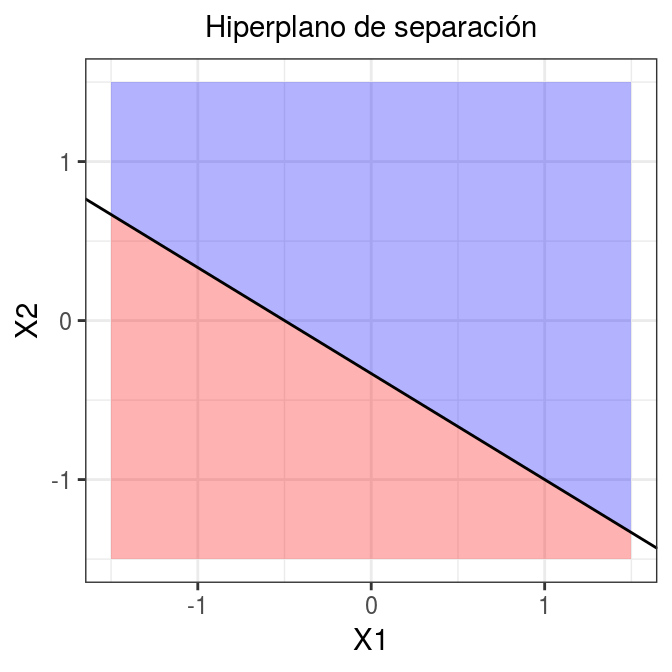

**Clasificación binaria empleando un hiperplano**


Cuando se dispone de $n$ observaciones, cada una con $p$ predictores y cuya variable respuesta tiene dos niveles (de aquí en adelante identificados como $+1$ y $−1$), se pueden emplear hiperplanos para construir un clasificador que permita predecir a que grupo pertenece una observación en función de sus predictores. Este mismo problema puede abordarse también con otros métodos (regresión logística, LDA, árboles de clasificación…) cada uno con ventajas y desventajas.

Para facilitar la comprensión, las siguientes explicaciones se basan en un espacio de dos dimensiones, donde un hiperplano es una recta. Sin embargo, los mismos conceptos son aplicables a dimensiones superiores.

**CASOS PERFECTAMENTE SEPARABLES LINEALMENTE**

Si la distribución de las observaciones es tal que se pueden separar linealmente de forma perfecta en las dos clases ($+1$ y $−1$), entonces, un hiperplano de separación cumple que:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p > 0, \ si \ y_i=1$$
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p < 0, \ si \ y_i=-1$$

Al identificar cada clase como $+1$ o $−1$, y dado que multiplicar dos valores negativos resultan en un valor positivo, las dos condiciones anteriores pueden simplificarse en una única:
$$y_i(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p) > 0, \ \textrm{ para } \ i = 1 ... n$$

Bajo este escenario, el clasificador más sencillo consiste en asignar cada observación a una clase dependiendo del lado del hiperplano en el que se encuentre. Es decir, la observación $\textbf{$x^*$}$ se clasifica acorde al signo de la función $f(\textbf{$x^\ast$}) = \beta_0 + \beta_1x^\ast_1 + \beta_2x^\ast_2 + ... + \beta_px^\ast_p$. Si $f(x^\ast)$ es positiva, la observación se asigna a la clase $+1$, si es negativa, a la clase $−1$. Además, la magnitud de $f(x^\ast)$ permite saber cómo de lejos está la observación del hiperplano y con ello la confianza de la clasificación.

La definición de hiperplano para casos perfectamente separables linealmente resulta en un número infinito de posibles hiperplanos, lo que hace necesario un método que permita seleccionar uno de ellos como clasificador óptimo.


<div class="figure">
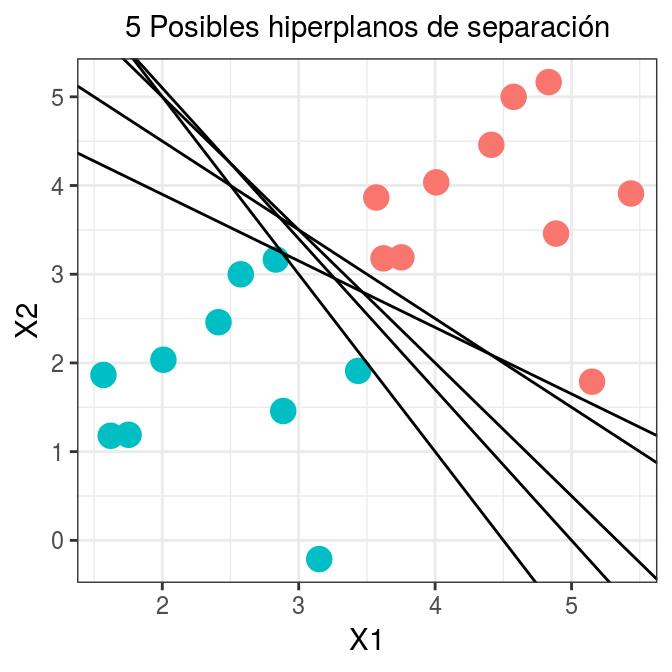

La solución a este problema consiste en seleccionar como clasificador óptimo al que se conoce como *maximal margin hyperplane o hiperplano óptimo de separación*, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Para obtenerlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina como de alejado está el hiperplano de las observaciones de entrenamiento. El maximal margin hyperplane se define como el hiperplano que consigue un mayor margen, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible. Aunque esta idea suena razonable, no es posible aplicarla, ya que habría infinitos hiperplanos contra los que medir las distancias. En su lugar, se recurre a métodos de optimización. Para encontrar una descripción más detallada de la solución por optimización consultar (*Support Vector Machines Succinctly by Alexandre Kowalczyk*).

<div class="figure">
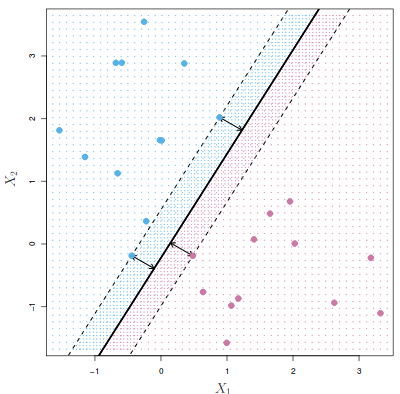


La imagen anterior muestra el maximal margin hyperplane para un conjunto de datos de entrenamiento. Las tres observaciones equidistantes respecto al maximal margin hyperplane se encuentran a lo largo de las líneas discontinuas que indican la anchura del margen. A estas observaciones se les conoce como vectores soporte, ya que son vectores en un espacio p-dimensional y soportan (definen) el maximal margin hyperplane. Cualquier modificación en estas observaciones (vectores soporte) conlleva cambios en el maximal margin hyperplane. Sin embargo, modificaciones en observaciones que no son vector soporte no tienen impacto alguno en el hiperplano.

*CASOS CUASI-SEPARABLES LINEALMENTE*

El maximal margin hyperplane descrito en el apartado anterior es una forma muy simple y natural de clasificación siempre y cuando exista un hiperplano de separación. En la gran mayoría de casos reales, los datos no se pueden separar linealmente de forma perfecta, por lo que no existe un hiperplano de separación y no puede obtenerse un maximal margin hyperplane.

<div class="figure">
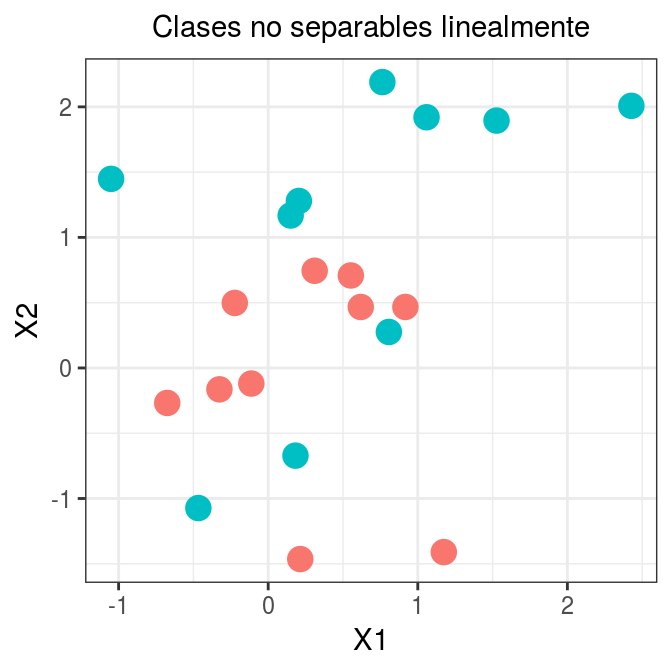


Para solucionar estas situaciones, se puede extender el concepto de *maximal margin hyperplane* para obtener un hiperplano que casi separe las clases, pero permitiendo que cometa unos pocos errores. A este tipo de hiperplano se le conoce como *Support Vector Classifier o Soft Margin*

##Support Vector Classifier o Soft Margin SVM


El Maximal Margin Classifier descrito en la sección anterior tiene poca aplicación práctica, ya que rara vez se encuentran casos en los que las clases sean perfecta y linealmente separables. De hecho, incluso cumpliéndose estas condiciones ideales, en las que exista un hiperplano capaz de separar perfectamente las observaciones en dos clases, esta aproximación sigue presentando dos inconvenientes:

Dado que el hiperplano tiene que separar perfectamente las observaciones, es muy sensible a variaciones en los datos. Incluir una nueva observación puede suponer cambios muy grandes en el hiperplano de separación (poca robustez).

Que el maximal margin hyperplane se ajuste perfectamente a las observaciones de entrenamiento para separarlas todas correctamente suele conllevar problemas de overfitting.

Por estas razones, es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones (menos problemas de overfitting). Esto es exactamente lo que consiguen los clasificadores de vector soporte, también conocidos como soft margin classifiers o Support Vector Classifiers. Para lograrlo, en lugar de buscar el margen de clasificación más ancho posible que consigue que las observaciones estén en el lado correcto del margen; se permite que ciertas observaciones estén en el lado incorrecto del margen o incluso del hiperplano.

La siguiente imagen muestra un clasificador de vector soporte ajustado a un pequeño set de observaciones. La línea continua representa el hiperplano y las líneas discontinuas el margen a cada lado. Las observaciones 2, 3, 4, 5, 6, 7 y 10 se encuentran en el lado correcto del margen (también del hiperplano) por lo que están bien clasificadas. Las observaciones 1 y 8, a pesar de que se encuentran dentro del margen, están en el lado correcto del hiperplano, por lo que también están bien clasificadas. Las observaciones 11 y 12, se encuentran en el lado erróneo del hiperplano, su clasificación es incorrecta. Todas aquellas observaciones que, estando dentro o fuera del margen, se encuentren en el lado incorrecto del hiperplano, se corresponden con observaciones de entrenamiento mal clasificadas.

<div class="figure">
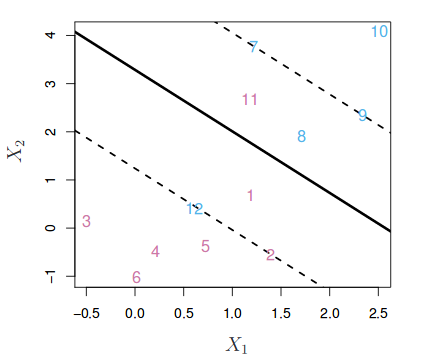


La identificación del hiperplano de un clasificador de vector soporte, que clasifique correctamente la mayoría de las observaciones a excepción de unas pocas, es un problema de optimización convexa. Si bien la demostración matemática queda fuera del objetivo de esta introducción, es importante mencionar que el proceso incluye un hiperparámetro de tuning $C$. $C$ controla el número y severidad de las violaciones del margen (y del hiperplano) que se toleran en el proceso de ajuste. Si $C=\infty$, no se permite ninguna violación del margen y por lo tanto, el resultado es equivalente al Maximal Margin Classifier (teniendo en cuenta que esta solución solo es posible si las clases son perfectamente separables). Cuando más se aproxima $C$ a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano. $C$ es a fin de cuentas el hiperparámetro encargado de controlar el balance entre bias y varianza del modelo. En la práctica, su valor óptimo se identifica mediante cross-validation.

El proceso de optimización tiene la peculiaridad de que solo las observaciones que se encuentran justo en el margen o que lo violan influyen sobre el hiperplano. A estas observaciones se les conoce como vectores soporte y son las que definen el clasificador obtenido. Esta es la razón por la que el parámetro $C$ controla el balance entre bias y varianza. Cuando el valor de $C$ es pequeño, el margen es más ancho, y más observaciones violan el margen, convirtiéndose en vectores soporte. El hiperplano está, por lo tanto, sustentado por más observaciones, lo que aumenta el bias pero reduce la varianza. Cuando mayor es el valor de $C$, menor el margen, menos observaciones serán vectores soporte y el clasificador resultante tendrá menor bias pero mayor varianza.

Otra propiedad importante que deriva de que el hiperplano dependa únicamente de una pequeña proporción de observaciones (vectores soporte), es su robustez frente a observaciones muy alejadas del hiperplano. Esto hace al método de clasificación vector soporte distinto a otros métodos tales como Linear Discrimiant Analysis (LDA), donde la regla de clasificación depende de la media de todas las observaciones.

### Ejemplo

Para mostrar el uso de un Support Vector Classifier como clasificador binario, se simulan observaciones en un espacio bidimensional que pertenecen a dos clases. Este ejemplo se ha obtenido de los videos asociados al libro Introduction to Statistical Learning, que no es igual al presentado en el libro.

En los siguientes ejemplos, se emplea la función ``svm()`` contenida en el paquete ``e1071``. Esta función ajusta Support Vector Classifier si se le especifica el argumento ``kernel="linear"`` (como se describe más adelante, el método de Support Vector Machines es equivalente al Support Vector Classifier cuando el kernel utilizado es lineal). El argumento cost determina la penalización aplicada por violar el margen, es el nombre que emplea esta función para el hiperparámetro $C$.